## Example data client

The following two lines of code obtain and chart a small dataset. More details 
are provided [below](#Data-client-explanation).

data query result type: <class 'list'> with 8400 elements
prep time 6.43 seconds; data vector length: 4200


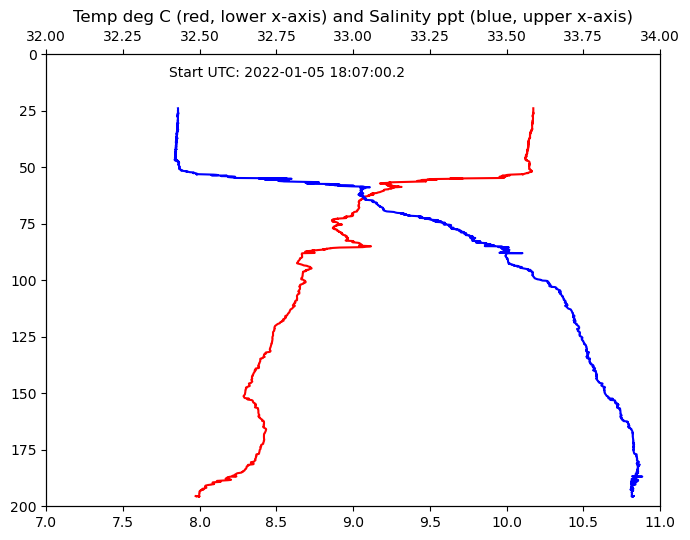

In [3]:
import oceanclient as oc
dfT, dfS = oc.Chart('2022-01-05', 8)

In [ ]:
dfT

In [ ]:
dfS

### Data client explanation


This narrative works in retrograde fashion: From the above brief example
backwards to the physical system we are interested in observing.


In order for this code 


```
import oceanclient as oc
dfT, dfS = oc.Chart('2022-01-05', 6)
```


to run properly there are three necessary preparation steps. 


The first step is to clone a GitHub
repository, that is, make a local copy on your workstation. 
The Linux `bash` shell command is


```
git clone https://github.com/robfatland/oceanclient
```


This creates a folder called `oceanclient` containing a Python
module file `oceanclient.py` and this Jupyter notebook `sensors.ipynb`. 


This is the second preparatory step is to install Python including
Jupyter Lab, a browser based interpreter that runs Jupyter notebooks. 
This interpreter is launched via


```
jupyter lab
```


The third preparatory step is to verify that five Python libraries are installed,
to wit: `requests`, `time`, `pandas`, `numpy` and `matplotlib`. 


With this preparation done the two lines of code at the top of `sensors.ipynb` 
will run. The first line of code runs the module file `oceanclient.py` to make
the `Chart()` function available. The second line of code then runs `Chart()` by
passing two arguments: A date and an integer from 1 to 9 inclusive. 


In addition to presenting the chart, this function call also returns two `pandas` 
dataframes that are assigned to `dfT` and `dfS`, respectively temperature and
salinity. The data represent a profile (vertical axis) through 200 meters of the
upper ocean; hence as depth increases from the surface to 200 meters depth 
the ocean temperature decreases and the salinity increases. 


As this is a small example only the days January 1 through 5 of 2022 are available.
Profiling runs happen nine times per day, hence the second parameter takes a value 
of 1 through 9. In sum about 45 profiles are available. Next we turn to the backing
effort required to set up this data API. 

### Backing effort for this data API


To expand on how the data API demonstrated above was built it will be helpful to
imagine a **Builder**. A good candidate Builder for the path we have followed
would be an individual or a small team comfortable with Linux and Python; who
are also positively inclined towards learning a cloud computing platform. There are
many cloud platform options and we tend to focus on the three *big* ones: AWS, GCP 
and Azure. In fact this example was built on Azure but could as easily have been
built on any of the others.


A second person to imagine for this narrative is a **Designer** invested
in providing access to a particular **Dataset**. The Designer and Builder may of course
be the same person.


Since this is a retrograde narrative: Imagine that the Designer and Builder have 
already created a Dataset API. The next step is to create a Client in the manner
of this `oceanclient` repository described above. A more involved process is to
create and publish a Python *package* to PyPI / conda-forge etcetera. This has
the advantage of increasing the scope of availability of the Client; but further
details are beyond the scope of these remarks.


The next step of this retrograde narrative is to build the data API. In other words:
Chronologically this happens first. Here is a broad outline of the steps including
parenthetical details from this example.


- Design the data access of interest: Dataset and format
    - Temperature and Salinity are selected from 20 sensor types as simple examples
    - Pandas dataframes are very simple to work with (contrast with XArray Datasets)
- Configure / clean the data
    - We are only interested in profiler *ascent* data
        - ...while *descent* and *at-rest* sensor data are not of primary importance
        - ...the nine ascent profiles acquired per day are indexed 1, 2, ..., 9
- Load the data into a cloud database
    - We used VSCode as the development environment
        - ...in conjunction with a low power / low cost Azure Virtual Machine
        - ...and a NoSQL database (see *Azure Cosmos DB*)
- Test simple queries to verify correct operation
    - Here the data accessed through the cloud database should match "same data in hand" 
- Create a web-facing point of contact
    - This is a URL that runs a serverless function
    - See 'Azure Function App'
    - We can verify this API works as expected prior to connecting it to the data source
- Connect local Python code to the API by means of the `requests` library
    - Once this is established it will be helpful in creating the Client as described above
- Provide secure credentials to the serverless function to access the database
    - This insulates the database from direct contact from the internet
- Connect the serverless function to the database
    - The test is now a there-and-back-again transaction:
        - Local Python code > API call > request > Serverless Function > Database query
        - Database response > Serverless function > reply > local Python
    - This transaction works smoothly for a few thousand data points
        - The transaction time is a few seconds


Detailed notes on putting this example system together may be found at 
[this site](https://github.com/robfatland/nexus/blob/gh-pages/data/api.md).


To reverse the retrograde narrative: A research team decides to make data available 
through an HTTP API. The Designer and Builder work together to refine and stage the
key dataset on a cloud database. They set up and test a secure Serverless Function
interface running on the cloud that returns data from this database. The Serverless
Function is low cost and easy to build using well-established tools. Finally the
Designer and Builder set up an example Client as a GitHub repository. This is easily
copied to a local workstation via `git clone` where it can be run as an example
interface to the data. 






In [1]:
import torch